In [1]:
import requests 
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
req = requests.get('https://imarticus.org/')

In [3]:
soup = BeautifulSoup(req.content,"html.parser")

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="28bhVVSPQXm7LkMsD4lUqNpwhEmKv9zYFBvX5Nb_gaU" name="google-site-verification"/>
  <title>
   Online Training Courses &amp; Education Programs | Imarticus Learning
  </title>
  <meta content="Imarticus Learning offers a range of Finance, Analytics, Technology, Fintech, &amp; Business Analysis certification courses with placement assistance to help you advance your career" name="description"/>
  <meta content="imarticus, imarticus learning, finance courses, analytic courses, technology courses" name="keywords"/>
  <meta content="Online Training Courses &amp; Education Programs Imarticus Learning" property="og:title"/>
  <meta content="Imarticus Learning offers a range of Finance, Analytics, Technology, Fintech, &amp; Business Analysis certification courses with placement assistance to help you advance your career" property="og:description"/>
  <meta content="htt

In [5]:
print(soup.get_text())

Online Training Courses & Education Programs | Imarticus Learningtry  catch (error) ProgramsAll ProgramsOUR DOMAINSFINANCEJOB ASSURED PROGRAMSCertified Investment Banking Operations ProfessionalPostgraduate Program in Financial AnalysisPostgraduate Program in Banking and FinanceCERTIFICATION COURSESCertified Management Accountant USAKPMG Financial Analysis ProdegreeAssociation of Chartered Certified Accountants, UKEXECUTIVE PROGRAMSIIM Indore Postgraduate Certificate Programme for Emerging CFOs IIM Lucknow Advanced Management Program in Financial Services and Capital Markets IIM Calcutta Executive Programme in Investment Banking and Capital MarketsSP Jain Global Professional Certificate in FinTechUNIVERSITY DEGREE PROGRAMSBIMTECH Postgraduate Diploma in ManagementKL MBA In FintechGeeta University MBA in FinTech JOB ASSURED PROGRAMSCertified Investment Banking Operations ProfessionalPostgraduate Program in Financial AnalysisPostgraduate Program in Banking and FinanceCERTIFICATION COURSE

In [6]:
titl = soup.title

In [7]:
print(titl.get_text())

Online Training Courses & Education Programs | Imarticus Learning


In [8]:
chunk = soup.get_text()

In [9]:
chunk = ''.join(chunk)

In [10]:
chunk = chunk.lower()

In [11]:
chunk

"online training courses & education programs | imarticus learningtry  catch (error) programsall programsour domainsfinancejob assured programscertified investment banking operations professionalpostgraduate program in financial analysispostgraduate program in banking and financecertification coursescertified management accountant usakpmg financial analysis prodegreeassociation of chartered certified accountants, ukexecutive programsiim indore postgraduate certificate programme for emerging cfos iim lucknow advanced management program in financial services and capital markets iim calcutta executive programme in investment banking and capital marketssp jain global professional certificate in fintechuniversity degree programsbimtech postgraduate diploma in managementkl mba in fintechgeeta university mba in fintech job assured programscertified investment banking operations professionalpostgraduate program in financial analysispostgraduate program in banking and financecertification cours

In [12]:
import re

In [13]:
chunk = re.sub(r'[^\w\s]','',chunk) #punc

In [14]:
chunk

'online training courses  education programs  imarticus learningtry  catch error programsall programsour domainsfinancejob assured programscertified investment banking operations professionalpostgraduate program in financial analysispostgraduate program in banking and financecertification coursescertified management accountant usakpmg financial analysis prodegreeassociation of chartered certified accountants ukexecutive programsiim indore postgraduate certificate programme for emerging cfos iim lucknow advanced management program in financial services and capital markets iim calcutta executive programme in investment banking and capital marketssp jain global professional certificate in fintechuniversity degree programsbimtech postgraduate diploma in managementkl mba in fintechgeeta university mba in fintech job assured programscertified investment banking operations professionalpostgraduate program in financial analysispostgraduate program in banking and financecertification coursescer

In [15]:
chunk = re.sub(r'\d+','',chunk) # remove all digits
chunk

'online training courses  education programs  imarticus learningtry  catch error programsall programsour domainsfinancejob assured programscertified investment banking operations professionalpostgraduate program in financial analysispostgraduate program in banking and financecertification coursescertified management accountant usakpmg financial analysis prodegreeassociation of chartered certified accountants ukexecutive programsiim indore postgraduate certificate programme for emerging cfos iim lucknow advanced management program in financial services and capital markets iim calcutta executive programme in investment banking and capital marketssp jain global professional certificate in fintechuniversity degree programsbimtech postgraduate diploma in managementkl mba in fintechgeeta university mba in fintech job assured programscertified investment banking operations professionalpostgraduate program in financial analysispostgraduate program in banking and financecertification coursescer

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [17]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(chunk)

In [18]:
data = [i for i in tokens if i not in stop_words]

In [19]:
data

['online',
 'training',
 'courses',
 'education',
 'programs',
 'imarticus',
 'learningtry',
 'catch',
 'error',
 'programsall',
 'programsour',
 'domainsfinancejob',
 'assured',
 'programscertified',
 'investment',
 'banking',
 'operations',
 'professionalpostgraduate',
 'program',
 'financial',
 'analysispostgraduate',
 'program',
 'banking',
 'financecertification',
 'coursescertified',
 'management',
 'accountant',
 'usakpmg',
 'financial',
 'analysis',
 'prodegreeassociation',
 'chartered',
 'certified',
 'accountants',
 'ukexecutive',
 'programsiim',
 'indore',
 'postgraduate',
 'certificate',
 'programme',
 'emerging',
 'cfos',
 'iim',
 'lucknow',
 'advanced',
 'management',
 'program',
 'financial',
 'services',
 'capital',
 'markets',
 'iim',
 'calcutta',
 'executive',
 'programme',
 'investment',
 'banking',
 'capital',
 'marketssp',
 'jain',
 'global',
 'professional',
 'certificate',
 'fintechuniversity',
 'degree',
 'programsbimtech',
 'postgraduate',
 'diploma',
 'managem

In [20]:
clean_data = " ".join(str(x) for x in data)

In [21]:
clean_data

'online training courses education programs imarticus learningtry catch error programsall programsour domainsfinancejob assured programscertified investment banking operations professionalpostgraduate program financial analysispostgraduate program banking financecertification coursescertified management accountant usakpmg financial analysis prodegreeassociation chartered certified accountants ukexecutive programsiim indore postgraduate certificate programme emerging cfos iim lucknow advanced management program financial services capital markets iim calcutta executive programme investment banking capital marketssp jain global professional certificate fintechuniversity degree programsbimtech postgraduate diploma managementkl mba fintechgeeta university mba fintech job assured programscertified investment banking operations professionalpostgraduate program financial analysispostgraduate program banking financecertification coursescertified management accountant usakpmg financial analysis 

In [22]:
clean_data = ' '.join(i for i in clean_data.split() if not (i.isalpha() and len(i) == 1)) #remove single words

In [23]:
clean_data = clean_data.strip() #whitespace

In [24]:
from wordcloud import WordCloud

In [25]:
wordcloud = WordCloud(width = 800,height = 800).generate(clean_data)

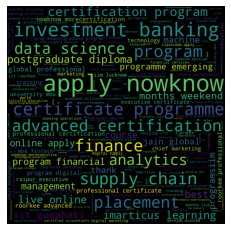

In [26]:
plt.imshow(wordcloud);
plt.axis('off');

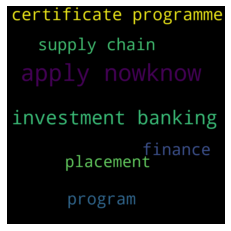

In [27]:
wordcloud = WordCloud(width = 800,height = 800,max_words = 7).generate(clean_data)
plt.imshow(wordcloud,interpolation = 'bilinear');
plt.axis('off');

In [28]:
words_dict = {}
for word in clean_data.split():
    words_dict[word] = words_dict.get(word,0) + 1 
for i in sorted(words_dict):
    print(i,':',words_dict[i])

academics : 1
academy : 1
accountant : 5
accountants : 5
accounting : 2
advanced : 21
ahead : 1
ahmedabad : 7
ai : 1
aiml : 1
algorithms : 5
alumni : 1
analysis : 5
analysisiim : 2
analysispostgraduate : 2
analysisswitch : 1
analytics : 13
analyticseict : 2
analyticsempowering : 1
analyticsexplore : 1
analyticsihub : 2
analyticsiim : 2
analyticsjob : 1
analyticslearn : 1
analyticspostgraduate : 2
analyticsprepare : 1
analyticstechnologyjob : 1
analyticstrending : 2
android : 2
appget : 2
appglobal : 1
apply : 26
appreciate : 2
apptrending : 1
around : 1
artificial : 10
association : 2
assured : 16
award : 1
awards : 2
awardssonya : 1
awardwinning : 1
back : 1
background : 2
bags : 1
bangalore : 2
bank : 2
banking : 22
banks : 2
batch : 1
bba : 5
bcom : 2
become : 1
believe : 2
best : 11
bimtech : 4
borastepgawith : 2
brands : 1
build : 1
business : 7
businesstaying : 1
calcutta : 6
callbacksay : 1
campus : 5
campusugc : 1
cant : 2
capital : 11
career : 8
careercore : 1
careerempowering

In [29]:
clean_data = clean_data.replace('apply','IMARTICUS')

In [30]:
clean_data = clean_data.replace('nowknow','LEARNING')

In [31]:
clean_data = clean_data.replace('iit','machine')

In [32]:
clean_data = clean_data.replace('guwahati','learning')

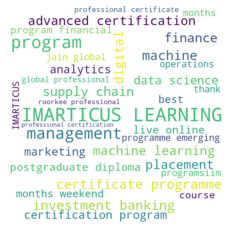

In [33]:
wordcloud = WordCloud(background_color = "white",width = 800,height = 800,max_words = 33,collocation_threshold = 43,random_state =  88).generate(clean_data)
plt.imshow(wordcloud,interpolation = 'bilinear');
plt.axis('off');

In [34]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
analyzer = SentimentIntensityAnalyzer()

In [36]:
scores = analyzer.polarity_scores(clean_data)

In [37]:
for key in sorted(scores):
    print('{0}:{1},'.format(key,scores[key]),end = '')

compound:0.9998,neg:0.008,neu:0.827,pos:0.164,

--------------------------------------------------------------------------------------------------------------------------------